<a href="https://colab.research.google.com/github/XM2202-02/hello-github-actions/blob/main/T2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

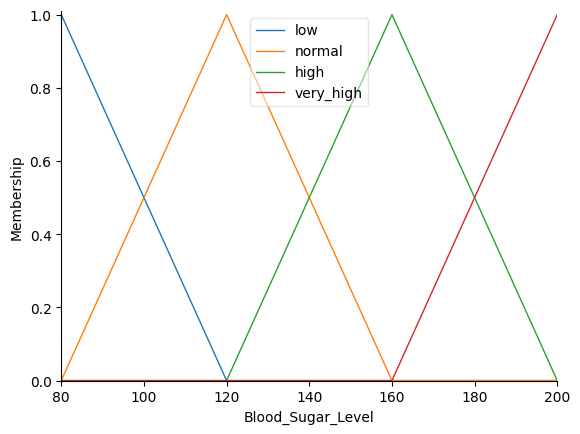

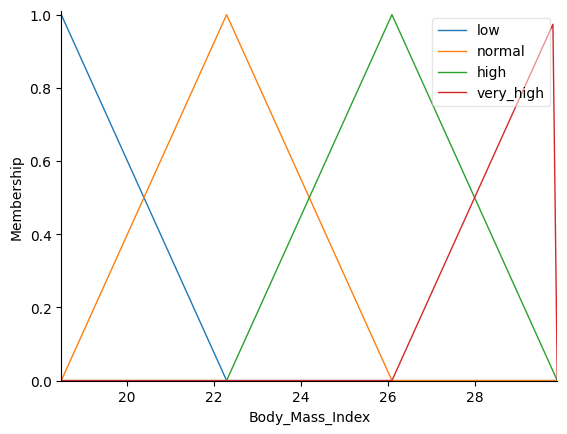

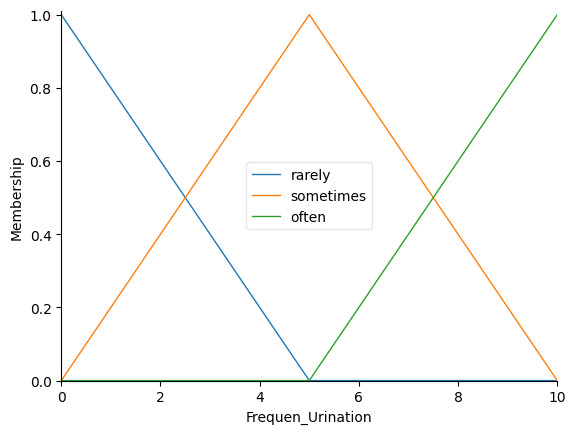

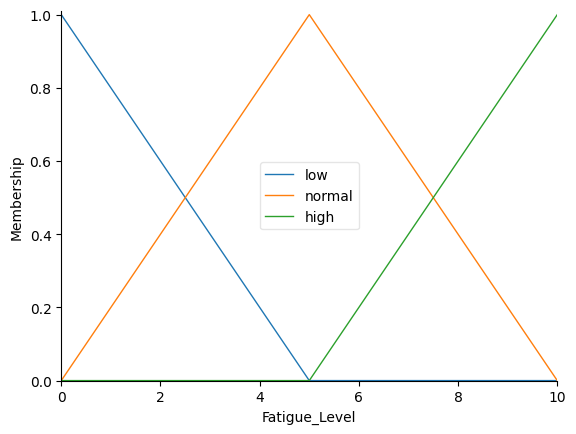

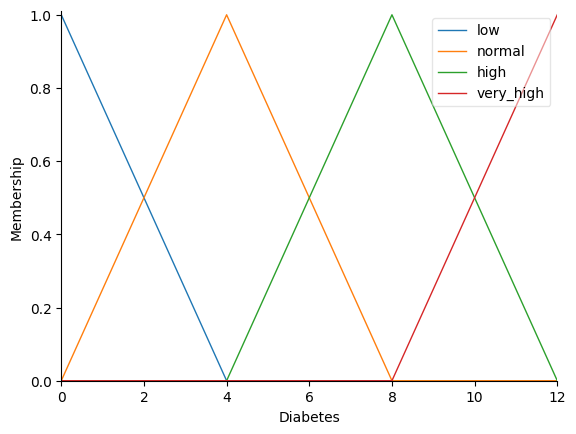

In [2]:
#2.2 He Thong Chan Doan
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
Blood_Sugar_Level=ctrl.Antecedent(np.arange(80,200.1,0.1),'Blood_Sugar_Level')
Body_Mass_Index=ctrl.Antecedent(np.arange(18.5,30,0.1),'Body_Mass_Index')
Frequen_Urination=ctrl.Antecedent(np.arange(0,10.1,0.1),'Frequen_Urination')
Fatigue_Level=ctrl.Antecedent(np.arange(0,10.1,0.1),'Fatigue_Level')
Diabetes=ctrl.Consequent(np.arange(0,12.1,0.1),'Diabetes')
Blood_Sugar_Level['low']=fuzz.trimf(Blood_Sugar_Level.universe,[80,80,120])
Blood_Sugar_Level['normal']=fuzz.trimf(Blood_Sugar_Level.universe,[80,120,160])
Blood_Sugar_Level['high']=fuzz.trimf(Blood_Sugar_Level.universe,[120,160,200])
Blood_Sugar_Level['very_high']=fuzz.trimf(Blood_Sugar_Level.universe,[160,200,200])
Body_Mass_Index['low']=fuzz.trimf(Body_Mass_Index.universe,[18.5,18.5,22.3])
Body_Mass_Index['normal']=fuzz.trimf(Body_Mass_Index.universe,[18.5,22.3,26.1])
Body_Mass_Index['high']=fuzz.trimf(Body_Mass_Index.universe,[22.3,26.1,29.9])
Body_Mass_Index['very_high']=fuzz.trimf(Body_Mass_Index.universe,[26.1,29.9,29.9])
Frequen_Urination['rarely']=fuzz.trimf(Frequen_Urination.universe,[0,0,5])
Frequen_Urination['sometimes']=fuzz.trimf(Frequen_Urination.universe,[0,5,10])
Frequen_Urination['often']=fuzz.trimf(Frequen_Urination.universe,[5,10,10])
Fatigue_Level['low']=fuzz.trimf(Fatigue_Level.universe,[0,0,5])
Fatigue_Level['normal']=fuzz.trimf(Fatigue_Level.universe,[0,5,10])
Fatigue_Level['high']=fuzz.trimf(Fatigue_Level.universe,[5,10,10])
Diabetes['low']=fuzz.trimf(Diabetes.universe,[0,0,4])
Diabetes['normal']=fuzz.trimf(Diabetes.universe,[0,4,8])
Diabetes['high']=fuzz.trimf(Diabetes.universe,[4,8,12])
Diabetes['very_high']=fuzz.trimf(Diabetes.universe,[8,12,12])
Blood_Sugar_Level.view()
Body_Mass_Index.view()
Frequen_Urination.view()
Fatigue_Level.view()
Diabetes.view()

Diabetes: 5.6444444444444395


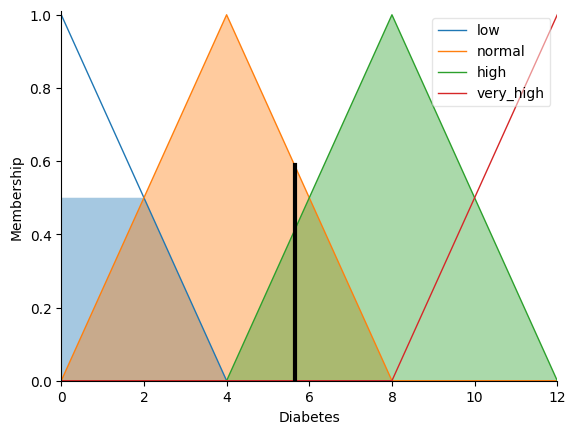

In [4]:
rule1=ctrl.Rule(Blood_Sugar_Level['very_high']|Frequen_Urination['often'],Diabetes['very_high'])
rule2=ctrl.Rule(Blood_Sugar_Level['very_high']|Frequen_Urination['sometimes'],Diabetes['high'])
rule3=ctrl.Rule(Blood_Sugar_Level['high']|Frequen_Urination['often'],Diabetes['high'])
rule4=ctrl.Rule(Blood_Sugar_Level['normal']|Frequen_Urination['rarely'],Diabetes['low'])
rule5=ctrl.Rule(Blood_Sugar_Level['very_high']|Body_Mass_Index['very_high'],Diabetes['very_high'])
rule6=ctrl.Rule(Blood_Sugar_Level['very_high']|Body_Mass_Index['high'],Diabetes['high'])
rule7=ctrl.Rule(Blood_Sugar_Level['high']|Body_Mass_Index['high'],Diabetes['high'])
rule8=ctrl.Rule(Blood_Sugar_Level['high']|Body_Mass_Index['normal'],Diabetes['normal'])
rule9=ctrl.Rule(Blood_Sugar_Level['normal']|Body_Mass_Index['normal'],Diabetes['normal'])
rule10=ctrl.Rule(Blood_Sugar_Level['very_high']|Fatigue_Level['high'],Diabetes['very_high'])
rule11=ctrl.Rule(Blood_Sugar_Level['high']|Fatigue_Level['high'],Diabetes['high'])
rule12=ctrl.Rule(Blood_Sugar_Level['high']|Fatigue_Level['normal'],Diabetes['normal'])
rule13=ctrl.Rule(Blood_Sugar_Level['normal']|Fatigue_Level['low'],Diabetes['low'])
diabetes_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13])
diabetes_sim=ctrl.ControlSystemSimulation(diabetes_ctrl)
diabetes_sim.input['Blood_Sugar_Level']=100
diabetes_sim.input['Body_Mass_Index']=18.5
diabetes_sim.input['Frequen_Urination']=5
diabetes_sim.input['Fatigue_Level']=5
diabetes_sim.compute()
print(f"Diabetes: {diabetes_sim.output['Diabetes']}")
Diabetes.view(sim=diabetes_sim)